In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/butterfly-image-classification/Training_set.csv
/kaggle/input/butterfly-image-classification/Testing_set.csv
/kaggle/input/butterfly-image-classification/test/Image_747.jpg
/kaggle/input/butterfly-image-classification/test/Image_561.jpg
/kaggle/input/butterfly-image-classification/test/Image_345.jpg
/kaggle/input/butterfly-image-classification/test/Image_2566.jpg
/kaggle/input/butterfly-image-classification/test/Image_1593.jpg
/kaggle/input/butterfly-image-classification/test/Image_844.jpg
/kaggle/input/butterfly-image-classification/test/Image_1975.jpg
/kaggle/input/butterfly-image-classification/test/Image_270.jpg
/kaggle/input/butterfly-image-classification/test/Image_526.jpg
/kaggle/input/butterfly-image-classification/test/Image_968.jpg
/kaggle/input/butterfly-image-classification/test/Image_2104.jpg
/kaggle/input/butterfly-image-classification/test/Image_1769.jpg
/kaggle/input/butterfly-image-classification/test/Image_2008.jpg
/kaggle/input/butterfly-image-classific

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/butterfly-image-classification/Training_set.csv')
df.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [5]:
df.columns

Index(['filename', 'label'], dtype='object')

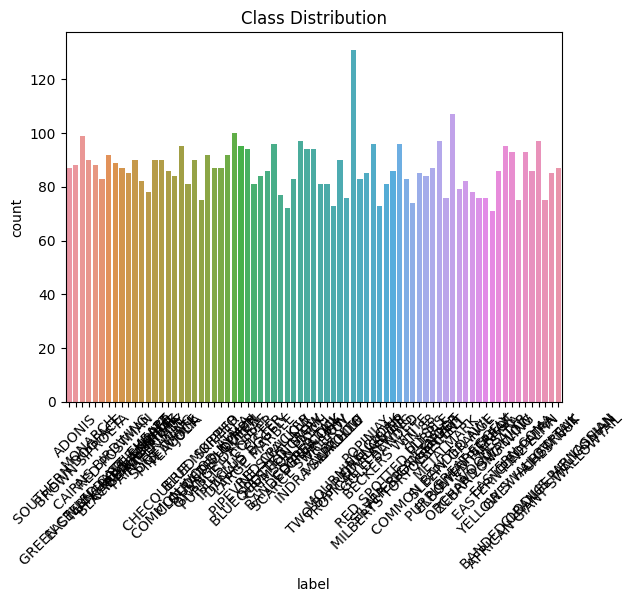

In [6]:
sns.countplot(x='label', data=df)
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()

In [7]:
def extract_features(img_path, size=(64, 64)):
    img = Image.open(img_path).resize(size).convert('RGB')
    return np.array(img).flatten()

# Apply to all images
features = []
for fname in df['filename']:
    full_path = os.path.join('/kaggle/input/butterfly-image-classification/train', fname)
    features.append(extract_features(full_path))

X = np.array(features)
y = df['label']
print("Feature shape:", X.shape)

Feature shape: (6499, 12288)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                   ADONIS       0.61      0.78      0.68        18
AFRICAN GIANT SWALLOWTAIL       0.38      0.60      0.46        15
           AMERICAN SNOOT       0.08      0.07      0.07        15
                    AN 88       0.50      0.41      0.45        17
                  APPOLLO       0.22      0.39      0.28        18
                    ATALA       0.20      0.65      0.31        20
 BANDED ORANGE HELICONIAN       0.33      0.45      0.38        20
           BANDED PEACOCK       0.47      0.41      0.44        17
            BECKERS WHITE       0.27      0.25      0.26        16
         BLACK HAIRSTREAK       0.15      0.41      0.22        17
              BLUE MORPHO       0.50      0.13      0.21        15
        BLUE SPOTTED CROW       0.27      0.18      0.21        17
           BROWN SIPROETA       0.38      0.40      0.39        20
            CABBAGE WHITE       0.38      0.78      0.51     

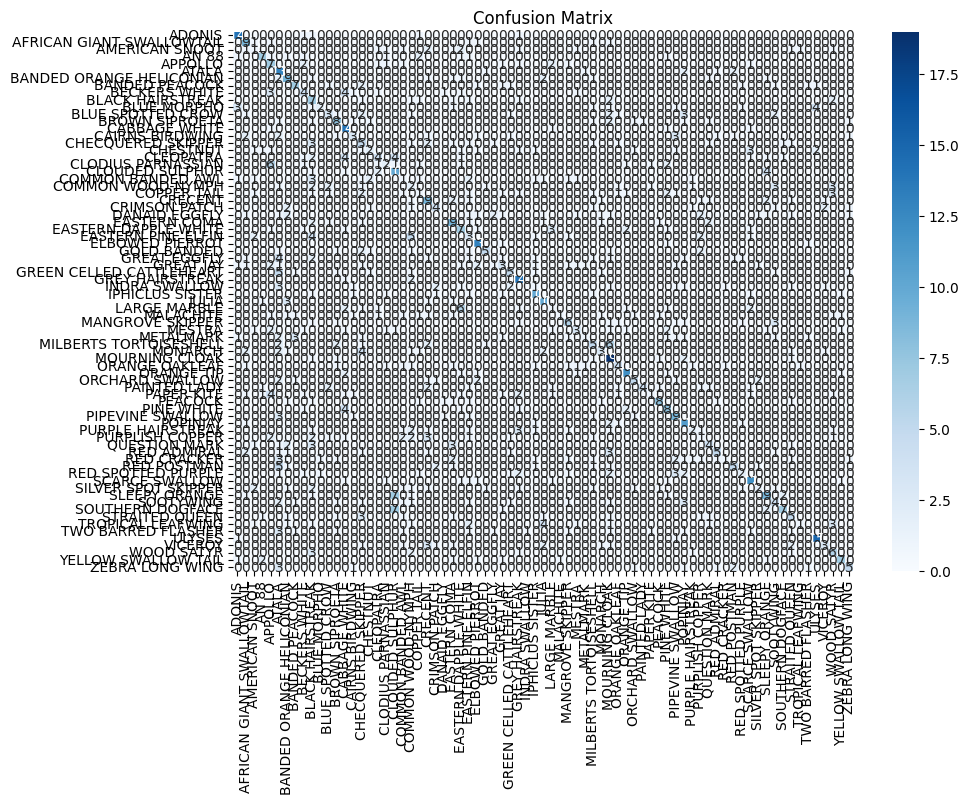

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()